In [127]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import mplhep as hep

from coffea.nanoevents import NanoEventsFactory, BaseSchema
import awkward as ak

plt.style.use(hep.style.CMS)
plt.clf()
plt.close("all")

# ordered as [edgecolor, facecolor]
mainblue = ["#42719f", "#6ab4ff"]
coralgreen = ["#117a65", "#138D75"]
reddish = ["#c82929", "#e42f2f"]
orangish = ["#d78939", "#e48a2f"]
blueish = ["#4387cb", "#2f89e4"]

plt.rcParams["font.family"] = "Helvetica Neue"

In [128]:
'''from matplotlib import font_manager

print("List of all fonts currently available in the matplotlib:")
print(*font_manager.findSystemFonts(fontpaths=None, fontext='ttf'), sep="\n")'''

'from matplotlib import font_manager\n\nprint("List of all fonts currently available in the matplotlib:")\nprint(*font_manager.findSystemFonts(fontpaths=None, fontext=\'ttf\'), sep="\n")'

## Load friend TTrees of the 3-fold model

In [129]:
train_region = 'SR'

# load files
threeTag = NanoEventsFactory.from_root(f'trained_on_{train_region}/threeTag_SvB_trained_on_{train_region}.root', schemaclass = BaseSchema, treepath = 'Events').events()
fourTag = NanoEventsFactory.from_root(f'trained_on_{train_region}/fourTag_10x_SvB_trained_on_{train_region}.root', schemaclass = BaseSchema, treepath = 'Events').events()
HH4b = NanoEventsFactory.from_root(f'trained_on_{train_region}/HH4b_SvB_trained_on_{train_region}.root', schemaclass = BaseSchema, treepath = 'Events').events()

## ThreeTag sample

In [130]:
SR = (threeTag.SvB_SR == True)
SB = (threeTag.SvB_SB == True)

In [152]:
# regions masks
SR = (threeTag.SvB_SR == True)
SB = (threeTag.SvB_SB == True)

# scores in SR
threeTag_SR_signal_score = threeTag.SvB_S[SR]
threeTag_SR_background_score = threeTag.SvB_BG[SR]

# scores in SB
threeTag_SB_signal_score = threeTag.SvB_S[SB]
threeTag_SB_background_score = threeTag.SvB_BG[SB]

### SvB score in SR

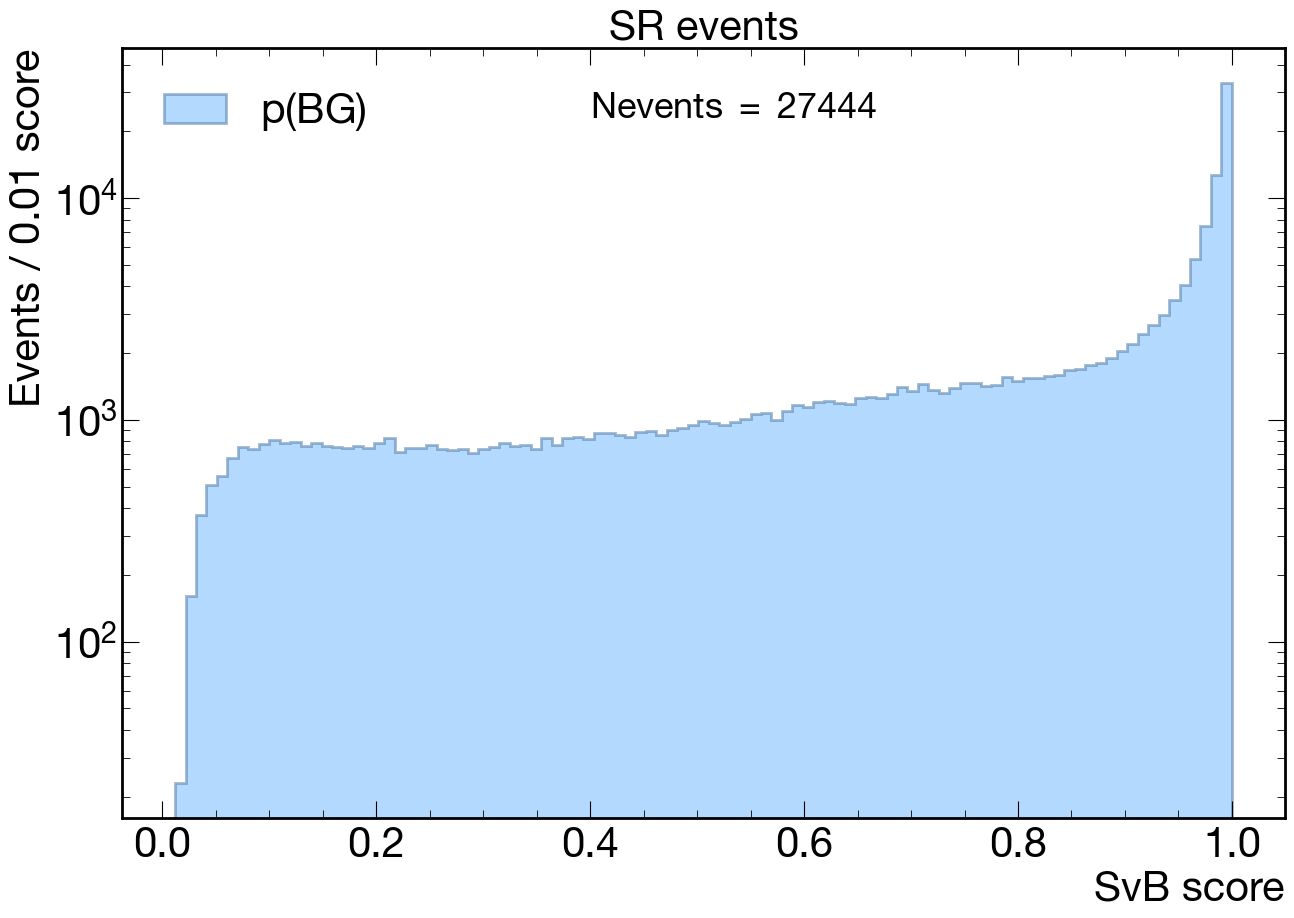

In [153]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
'''h, bins, _ = ax.hist(
    threeTag_SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)'''
h, bins, _ = ax.hist(
    threeTag_SR_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SR_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper left", fontsize = 30)
ax.set_title("SR events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/threeTag_SvB_SR.pdf")

### SvB score in SB

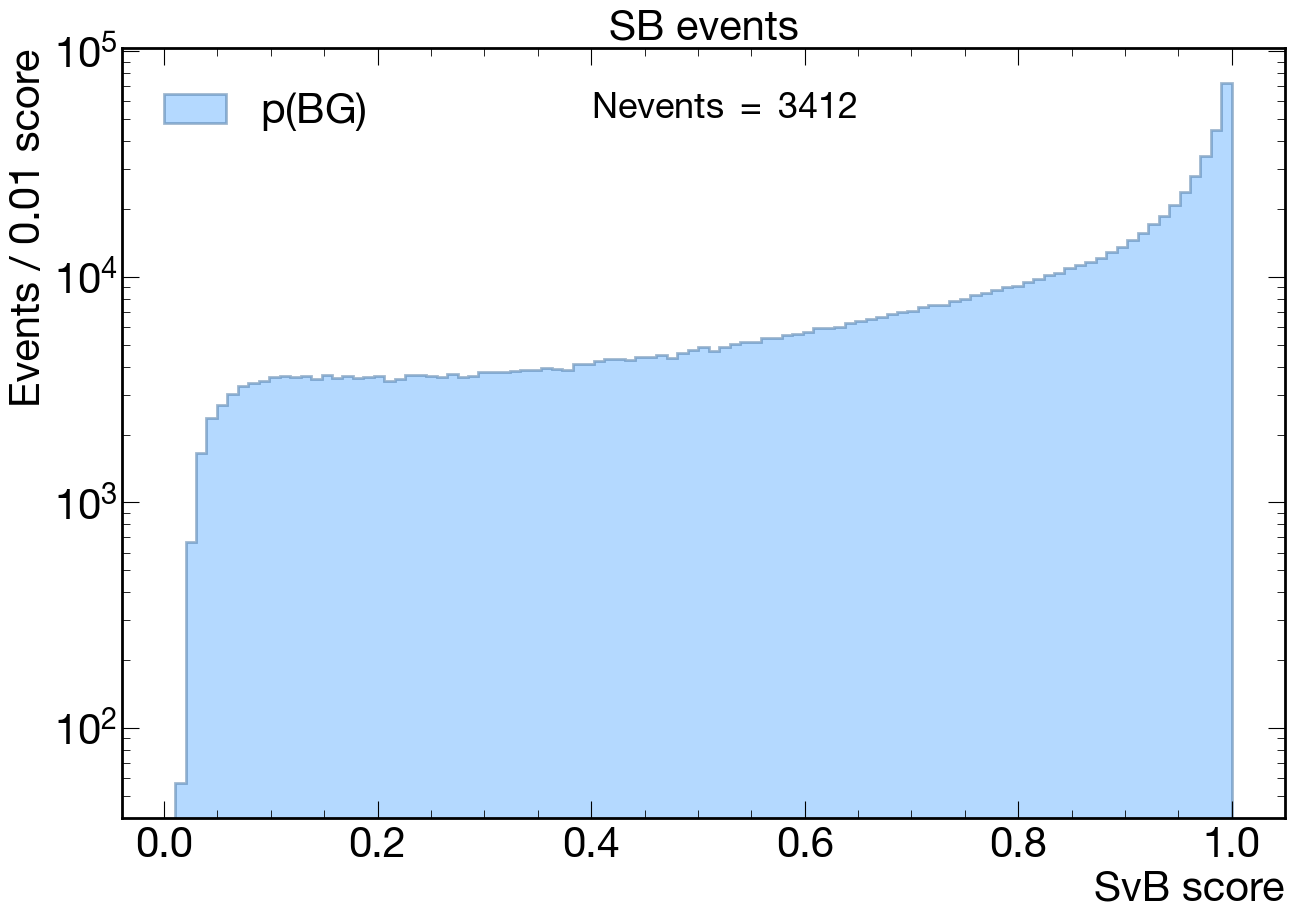

In [155]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
'''h, bins, _ = ax.hist(
    threeTag_SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)'''
h, bins, _ = ax.hist(
    threeTag_SB_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper left", fontsize = 30)
ax.set_title("SB events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/threeTag_SvB_SB.pdf")

## FourTag sample

In [156]:
# regions masks
SR = (fourTag.SvB_SR == True)
SB = (fourTag.SvB_SB == True)

# scores in SR
fourTag_SR_signal_score = fourTag.SvB_S[SR]
fourTag_SR_background_score = fourTag.SvB_BG[SR]

# scores in SB
fourTag_SB_signal_score = fourTag.SvB_S[SB]
fourTag_SB_background_score = fourTag.SvB_BG[SB]

### SvB score in SR

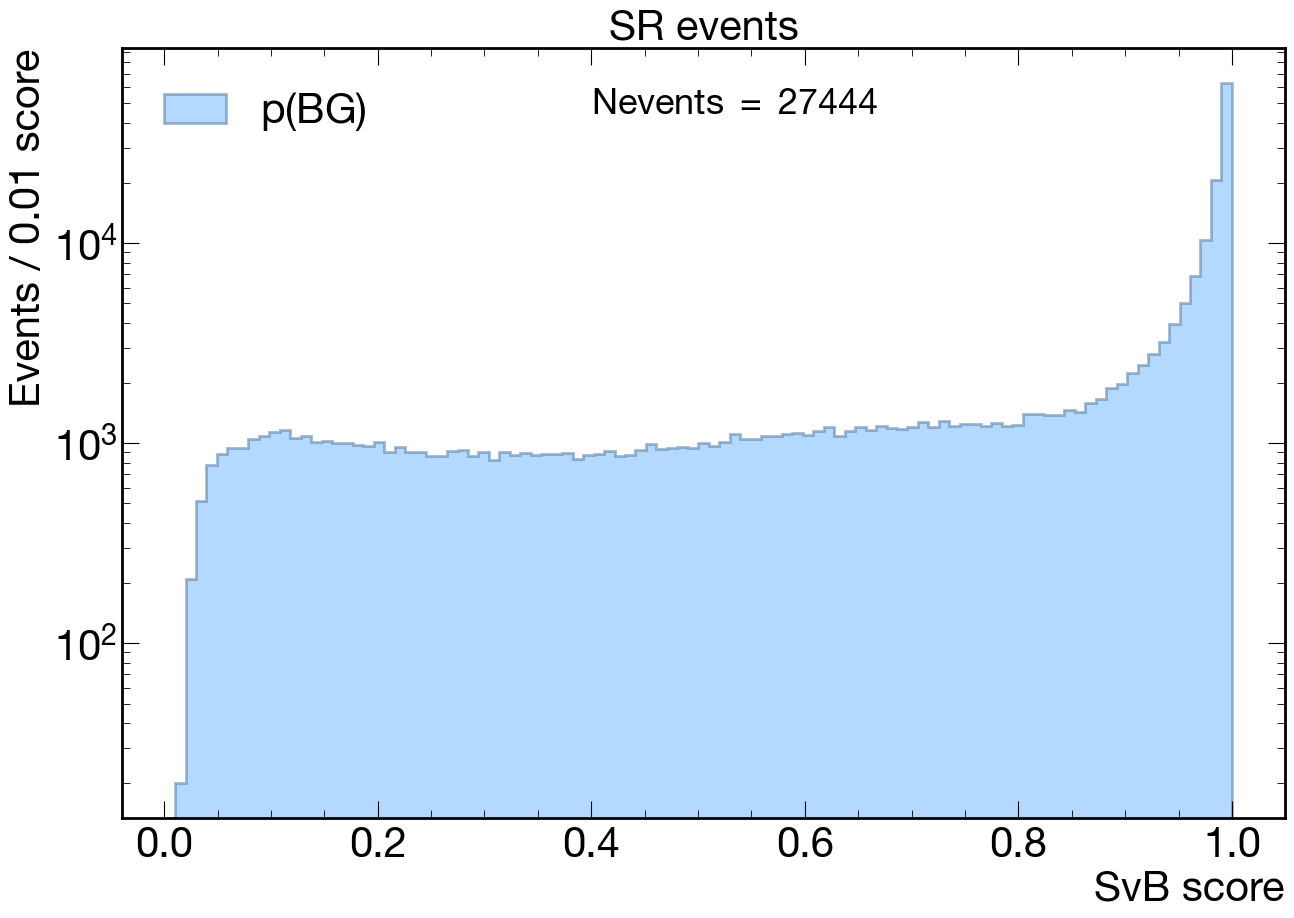

In [157]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
'''h, bins, _ = ax.hist(
    fourTag_SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)'''
h, bins, _ = ax.hist(
    fourTag_SR_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SR_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper left", fontsize = 30)
ax.set_title("SR events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/fourTag_SvB_SR.pdf")

### SvB score in SB

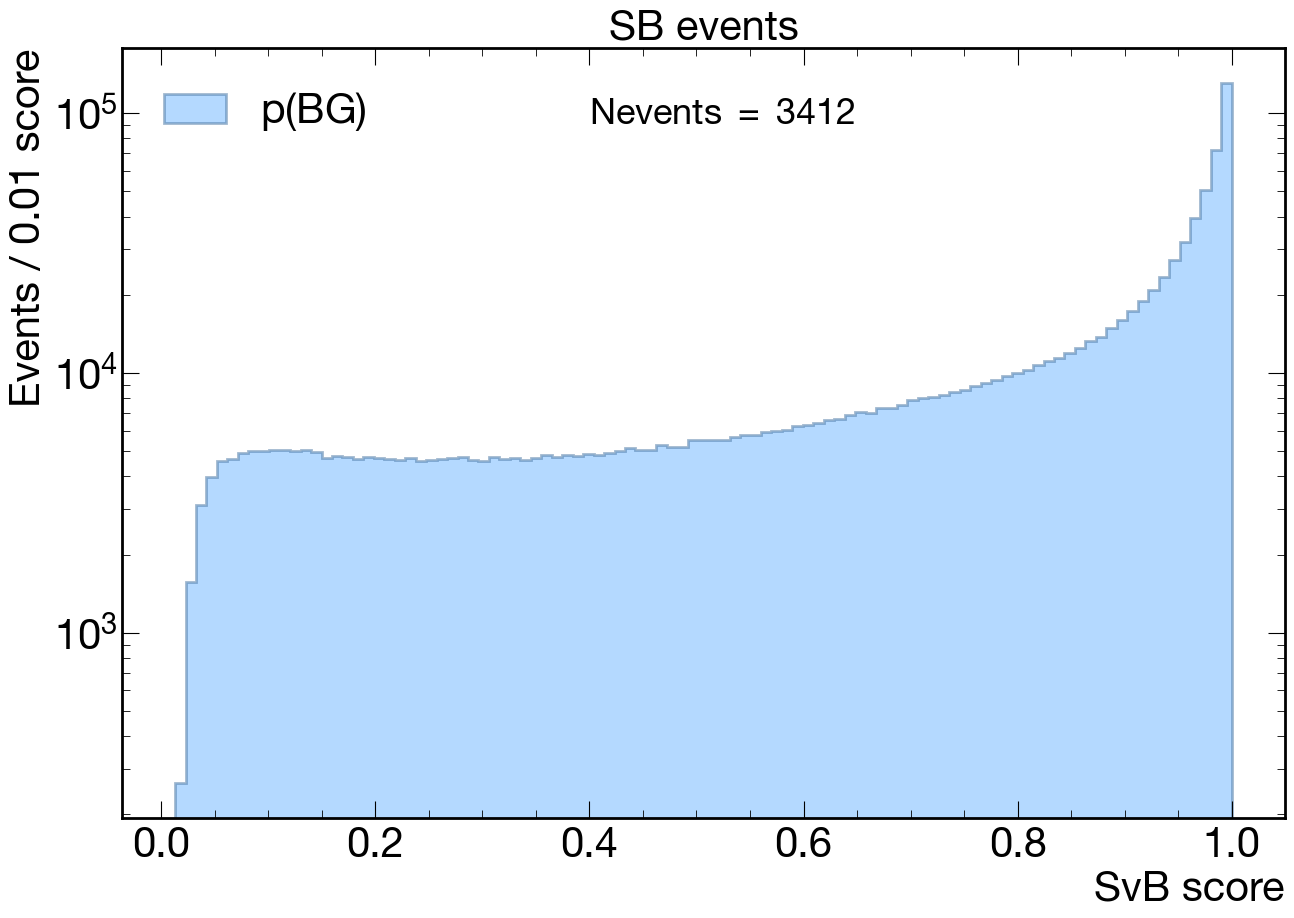

In [158]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
'''h, bins, _ = ax.hist(
    fourTag_SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)'''
h, bins, _ = ax.hist(
    fourTag_SB_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper left", fontsize = 30)
ax.set_title("SB events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/fourTag_SvB_SB.pdf")

## HH4b sample

In [159]:
# regions masks
SR = (HH4b.SvB_SR == True)
SB = (HH4b.SvB_SB == True)

# scores in SR
HH4b_SR_signal_score = HH4b.SvB_S[SR]
HH4b_SR_background_score = HH4b.SvB_BG[SR]

# scores in SB
HH4b_SB_signal_score = HH4b.SvB_S[SB]
HH4b_SB_background_score = HH4b.SvB_BG[SB]

### SvB score in SR

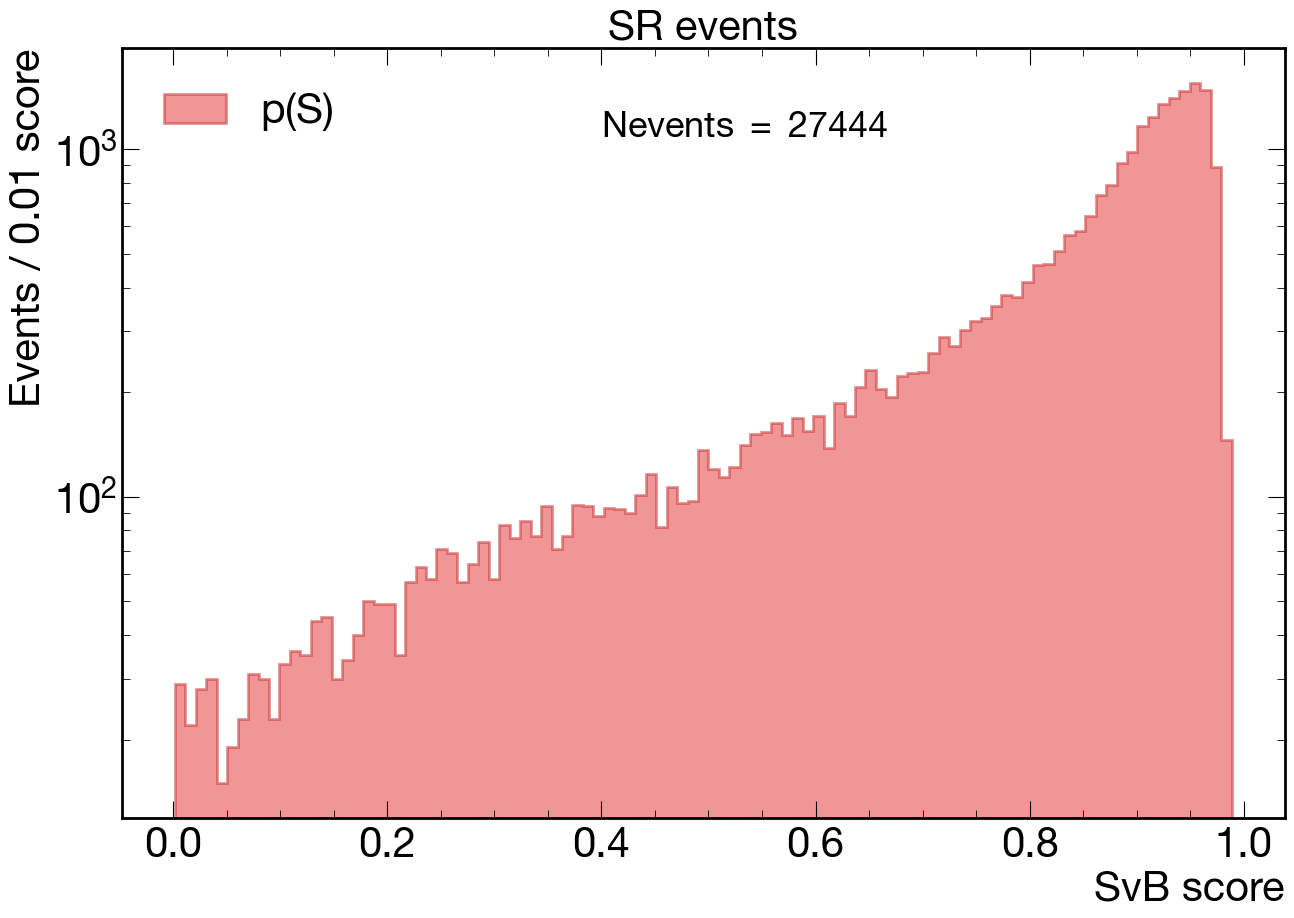

In [160]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    HH4b_SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
'''ax.hist(
    HH4b_SR_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)'''
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SR_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper left", fontsize = 30)
ax.set_title("SR events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/HH4b_SvB_SR.pdf")

### SvB score in SB

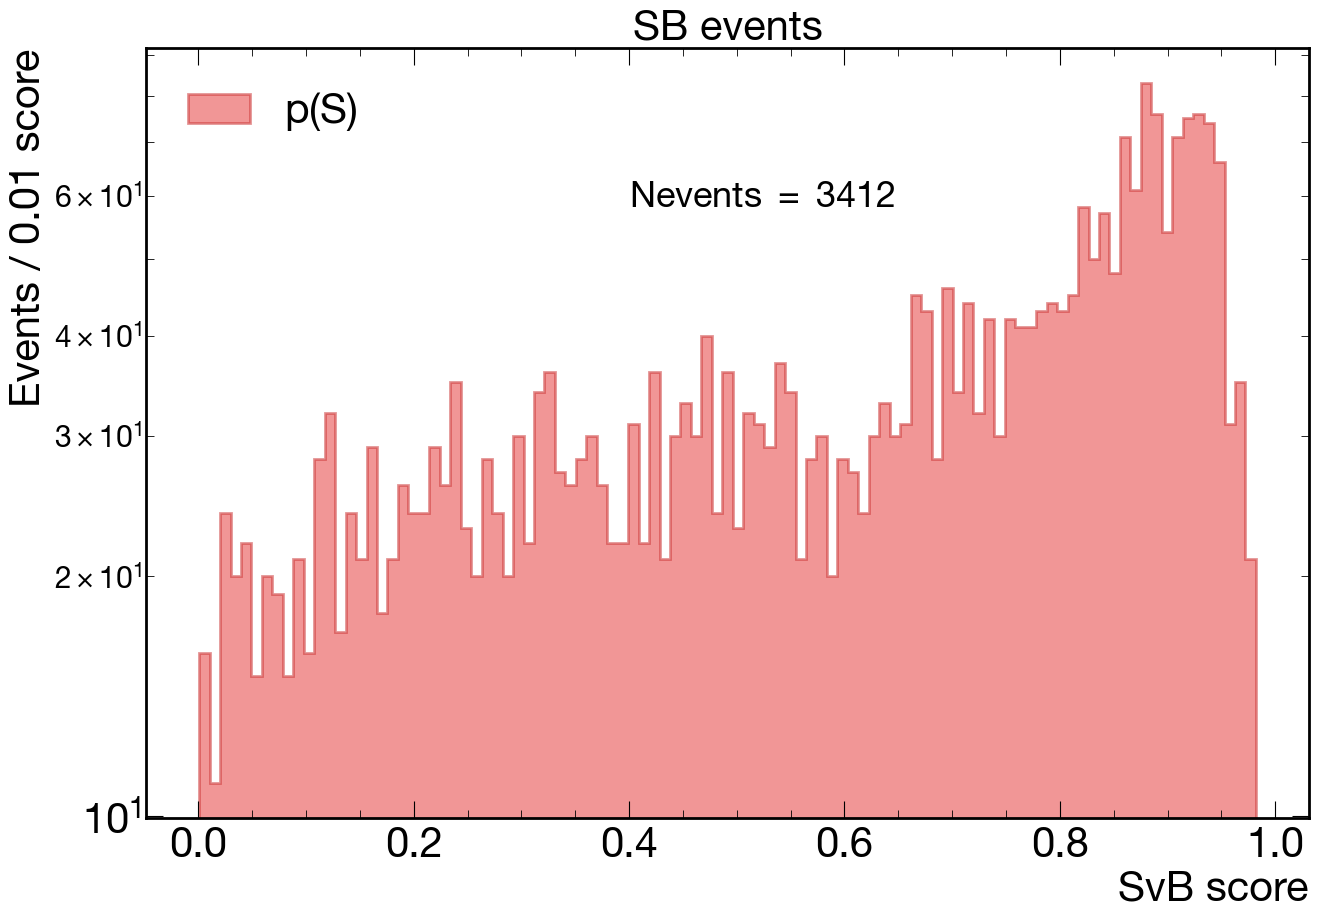

In [161]:
_min = 0.
_max = 1.
width = .01 # GeV
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h, bins, _ = ax.hist(
    HH4b_SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = reddish[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(S)$"
)
'''ax.hist(
    HH4b_SB_background_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = mainblue[1],
    alpha = .5,
    lw = 2.,
    label = r"$p(BG)$"
)'''
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("SvB score", fontsize = 30)
ax.set_ylabel("Events / %.2f score" % width, fontsize = 30)
ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper left", fontsize = 30)
ax.set_title("SB events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/HH4b_SvB_SB.pdf")

## SR combined

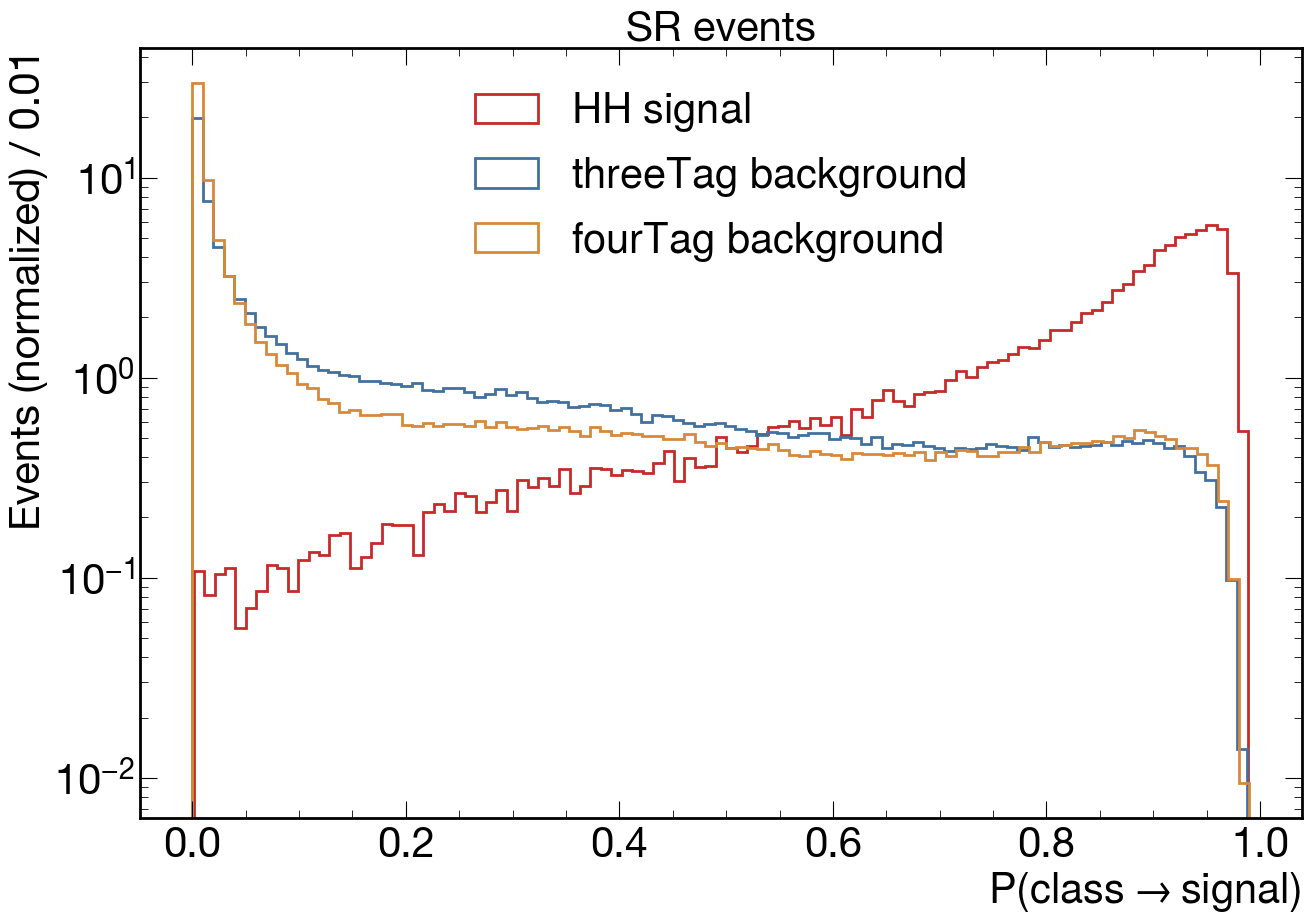

In [184]:
_min = 0.
_max = 1.
width = .01 # score
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h_HH, bins, _ = ax.hist(
    HH4b_SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = 'none',
    alpha = 1.,
    lw = 2.,
    density = True,
    label = r"${\rm HH\ signal}$"
)
h_threeTag, bins, _ = ax.hist(
    threeTag_SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = 'none',
    alpha = 1.,
    lw = 2.,
    density = True,
    label = r"${\rm threeTag\ background}$"
)

h_fourTag, bins, _ = ax.hist(
    fourTag_SR_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = orangish[0],
    facecolor = 'none',
    alpha = 1.,
    lw = 2.,
    density = True,
    label = r"${\rm fourTag\ background}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$ {\\rm P(class \\rightarrow signal)}$", fontsize = 30)
ax.set_ylabel("Events (normalized) / %.2f" % width, fontsize = 30)
#ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SR events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/combined_SvB_SR.pdf")

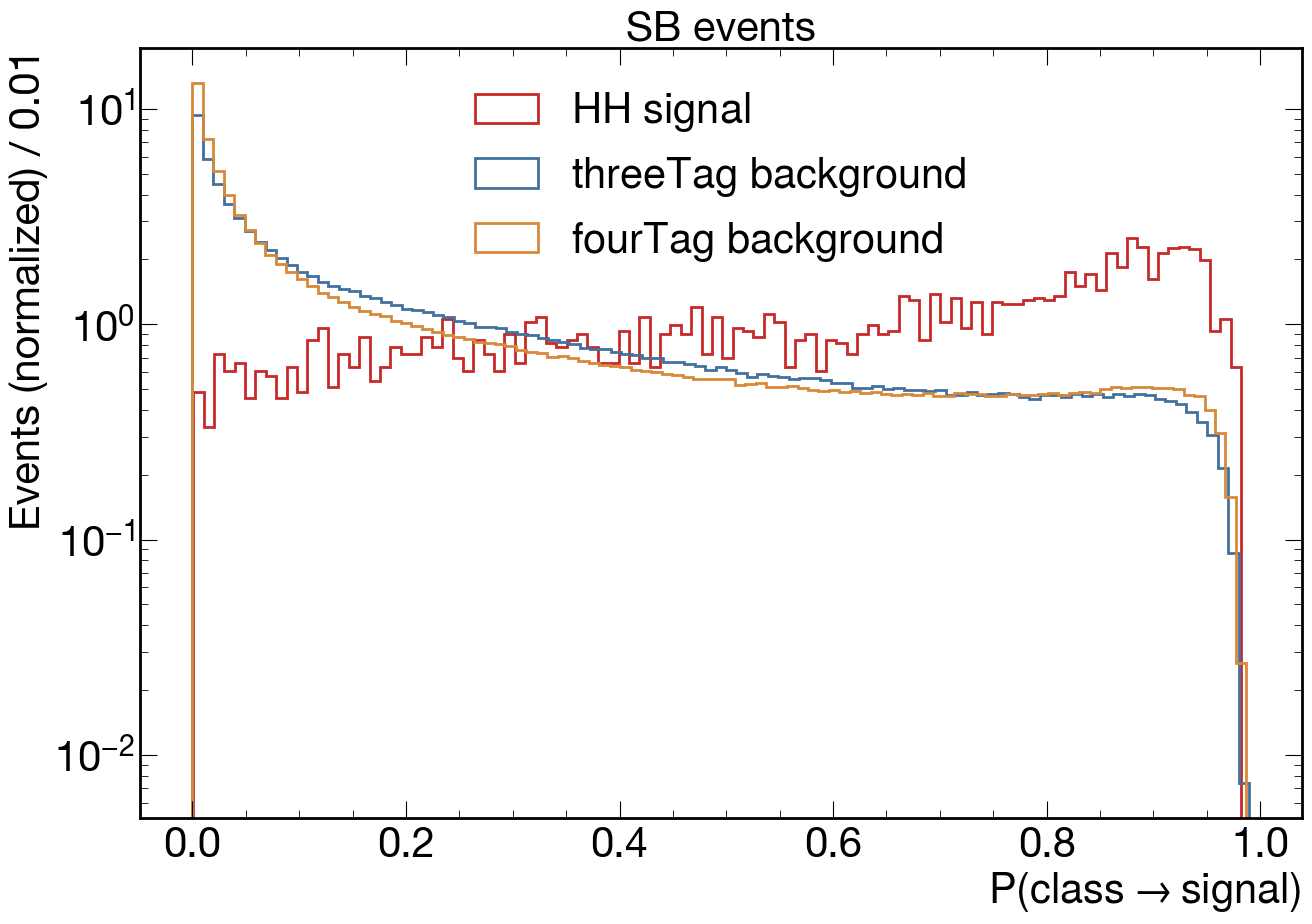

In [191]:
_min = 0.
_max = 1.
width = .01 # score
nbins = int(round((_max - _min) / width)) + 1


fig, ax = plt.subplots(figsize=(15, 10))
h_HH, bins, _ = ax.hist(
    HH4b_SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = reddish[0],
    facecolor = 'none',
    alpha = 1.,
    lw = 2.,
    density = True,
    label = r"${\rm HH\ signal}$"
)
h_threeTag, bins, _ = ax.hist(
    threeTag_SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = mainblue[0],
    facecolor = 'none',
    alpha = 1.,
    lw = 2.,
    density = True,
    label = r"${\rm threeTag\ background}$"
)

h_fourTag, bins, _ = ax.hist(
    fourTag_SB_signal_score,
    bins = nbins,
    histtype = 'stepfilled',
    ec = orangish[0],
    facecolor = 'none',
    alpha = 1.,
    lw = 2.,
    density = True,
    label = r"${\rm fourTag\ background}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$ {\\rm P(class \\rightarrow signal)}$", fontsize = 30)
ax.set_ylabel("Events (normalized) / %.2f" % width, fontsize = 30)
#ax.text((_max + _min) / 2 - .2 * (_max + _min) / 2, .70 * max(h), "Nevents $=$ %s" % len(SB_signal_score))
#ax.set_ylim(0, 5)
ax.legend(loc = "upper center", fontsize = 30)
ax.set_title("SB events", fontsize = 30)
plt.savefig(f"plots/trained_on_{train_region}/combined_SvB_SB.pdf")